In [1]:
from idf_analysis.idf_class import IntensityDurationFrequencyAnalyse
from idf_analysis.definitions import *
import pandas as pd
from os import path
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Intensity Duration Frequency Analyse

## Parameter

**series_kind**:

`SERIES.PARTIAL` = Partielle Serie (partial duration series, PDS) (peak over threshold, POT)

`SERIES.ANNUAL` = Jährliche Serie (annual maximum series, AMS)

**worksheet**:

`METHOD.KOSTRA`:
- DWA-A 531
- KOSTRA - empfohlen
- Stützstellen: 60 min und 12 h

`METHOD.CONVECTIVE_ADVECTIVE`:
- DWA-A 531
- Unterscheidung in überwiegend konvektiv und advektiv verursachte Starkregen
- Stützstellen: 3 h und 24 h

`METHOD.ATV`:
- ATV-A 121
- Stützstellen: 3 h und 48 h

**extended_durations** = Inkludiert die Dauerstufen `[0.75d, 1d, 2d, 3d, 4d, 5d, 6d]` in der Analyse (in d=Tage)

Standardmäßig berechnete Dauerstufen `[5m, 10m, 15m, 20m, 30m, 45m, 60m, 1.5h, 3h, 4.5h, 6h, 7.5h, 10h, 12h]`

In [2]:
idf = IntensityDurationFrequencyAnalyse(series_kind=SERIES.PARTIAL, worksheet=METHOD.KOSTRA, extended_durations=True)

I used the rain-time-series from ehyd.gv.at with the ID 112086 (Graz-Andritz)

In [3]:
data = pd.read_parquet('ehyd_112086.parquet')

In [4]:
output_directory = 'ehyd_112086_idf_data'

In [5]:
data.head()

,precipitation
datetime,
2007-09-18 11:09:00,0.1
2007-09-18 11:12:00,0.1
2007-09-18 11:13:00,0.1
2007-09-18 11:14:00,0.1
2007-09-18 11:20:00,0.1


In [6]:
data.tail()

,precipitation
datetime,
2016-12-28 22:24:00,0.006
2016-12-28 22:25:00,0.092
2016-12-28 22:26:00,0.006
2016-12-28 22:45:00,0.090
2016-12-28 22:46:00,0.006


In [7]:
idf.set_series(data['precipitation'])

Bei jeder neuen Berechnung werden Zwischenergebnisse erstellt, welche nur abhängig von der gewählten Serie `series_kind` und der angegebenen/benötigten Dauerstufen sind. Dieser Vorgang dauert einige Sekunden.
Auserdem enthalten diese Zwischenergebnisse die Parameter, die zur Berechnung der Regenhöhe und Regenspende benötigt werden.
Hier sind bereist die Berechnungsverfahren und Stückpunkte laut dem gewählten `worksheet` berücksichtigt.

Um Zeit zu sparen, gibt es die Möglichkeit, die Parameter zwischenzuspeichern und bei erneutem Aufrufen des Skripts werden diese Parameter nicht mehr berechnet, sondern aus der Datei gelesen.

In [8]:
idf.auto_save_parameters(path.join(output_directory, 'idf_parameters.yaml'))

Abgerufen können diese Zwischenergebnisse mit:

In [9]:
idf.parameters

## Berechnungen

In [10]:
idf.depth_of_rainfall(duration=15, return_period=1)

19.031596336052708

In [11]:
print('Resultierende Regenhöhe h_N(T_n={t:0.1f}a, D={d:0.1f}min) = {h:0.2f} mm'
      ''.format(t=1, d=15, h=idf.depth_of_rainfall(15, 1)))

Resultierende Regenhöhe h_N(T_n=1.0a, D=15.0min) = 19.03 mm


In [12]:
idf.rain_flow_rate(duration=15, return_period=1)

211.46218151169674

In [13]:
print('Resultierende Regenspende r_N(T_n={t:0.1f}a, D={d:0.1f}min) = {r:0.2f} L/(s*ha)'
      ''.format(t=1, d=15, r=idf.rain_flow_rate(15, 1)))

Resultierende Regenspende r_N(T_n=1.0a, D=15.0min) = 211.46 L/(s*ha)


In [14]:
idf.r_720_1()

11.410836729727

In [15]:
idf.get_return_period(height_of_rainfall=10, duration=15)

0.1430180144131331

In [16]:
idf.get_duration(height_of_rainfall=10, return_period=1)

5.433080747189968

In [17]:
idf.result_table().round(2)

,1,2,3,5,10,20,25,30,50,75,100
5,9.39,10.97,11.89,13.04,14.61,16.19,16.69,17.11,18.26,19.18,19.83
10,15.15,17.62,19.06,20.88,23.35,25.82,26.62,27.27,29.09,30.54,31.56
15,19.03,22.25,24.13,26.51,29.72,32.94,33.98,34.83,37.20,39.08,40.42
20,21.83,25.71,27.99,30.85,34.73,38.62,39.87,40.89,43.75,46.02,47.63
30,25.60,30.66,33.62,37.35,42.41,47.47,49.10,50.43,54.16,57.12,59.22
45,28.92,35.51,39.37,44.23,50.83,57.42,59.54,61.28,66.14,69.99,72.73
60,30.93,38.89,43.54,49.40,57.36,65.31,67.88,69.97,75.83,80.49,83.79
90,33.37,41.74,46.64,52.80,61.17,69.54,72.23,74.43,80.60,85.49,88.96
120,35.22,43.90,48.97,55.36,64.03,72.70,75.49,77.78,84.17,89.24,92.84
180,38.01,47.13,52.46,59.18,68.30,77.42,80.36,82.76,89.48,94.81,98.60


In [18]:
idf.result_table(add_names=True).round(2)

return period (a),1,2,3,5,10,20,25,30,50,75,100
frequency (1/a),1.000,0.500,0.333,0.200,0.100,0.050,0.040,0.033,0.020,0.013,0.010
duration (min),,,,,,,,,,,
5,9.39,10.97,11.89,13.04,14.61,16.19,16.69,17.11,18.26,19.18,19.83
10,15.15,17.62,19.06,20.88,23.35,25.82,26.62,27.27,29.09,30.54,31.56
15,19.03,22.25,24.13,26.51,29.72,32.94,33.98,34.83,37.20,39.08,40.42
20,21.83,25.71,27.99,30.85,34.73,38.62,39.87,40.89,43.75,46.02,47.63
30,25.60,30.66,33.62,37.35,42.41,47.47,49.10,50.43,54.16,57.12,59.22
45,28.92,35.51,39.37,44.23,50.83,57.42,59.54,61.28,66.14,69.99,72.73
60,30.93,38.89,43.54,49.40,57.36,65.31,67.88,69.97,75.83,80.49,83.79
90,33.37,41.74,46.64,52.80,61.17,69.54,72.23,74.43,80.60,85.49,88.96


To save the table as a csv:

In [19]:
idf.result_table(add_names=True).round(2).to_csv(path.join(output_directory, 'idf_table_UNIX.csv'), sep=',', decimal='.', float_format='%0.2f')

In [20]:
print(idf.result_table(add_names=True).round(2).to_string())

return period (a)    1       2       3       5       10      20      25      30      50      75      100
frequency (1/a)    1.000   0.500   0.333   0.200   0.100   0.050   0.040   0.033   0.020   0.013   0.010
duration (min)                                                                                          
5                   9.39   10.97   11.89   13.04   14.61   16.19   16.69   17.11   18.26   19.18   19.83
10                 15.15   17.62   19.06   20.88   23.35   25.82   26.62   27.27   29.09   30.54   31.56
15                 19.03   22.25   24.13   26.51   29.72   32.94   33.98   34.83   37.20   39.08   40.42
20                 21.83   25.71   27.99   30.85   34.73   38.62   39.87   40.89   43.75   46.02   47.63
30                 25.60   30.66   33.62   37.35   42.41   47.47   49.10   50.43   54.16   57.12   59.22
45                 28.92   35.51   39.37   44.23   50.83   57.42   59.54   61.28   66.14   69.99   72.73
60                 30.93   38.89   43.54   49.40   57.3

To create a color plot of the IDF curves:

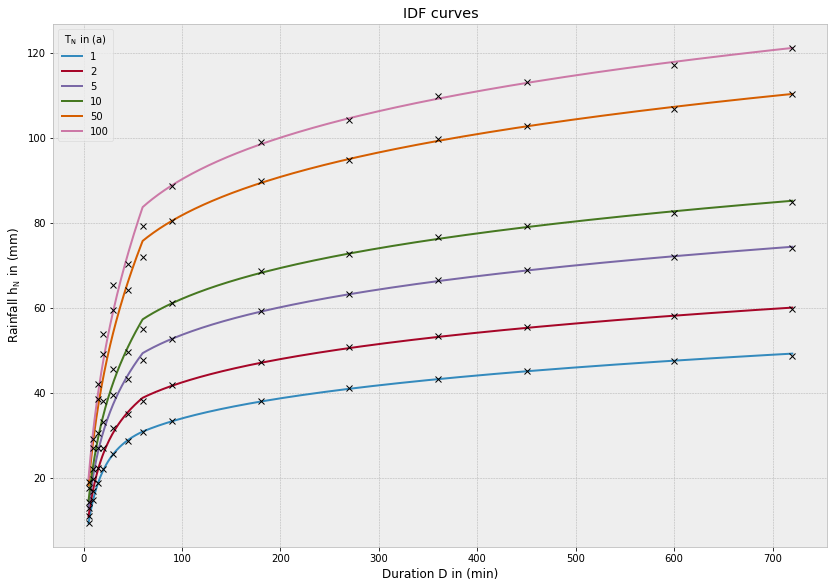

In [21]:
fig, ax = idf.result_figure(color=True)

To create a black/white plot of the IDF curves:

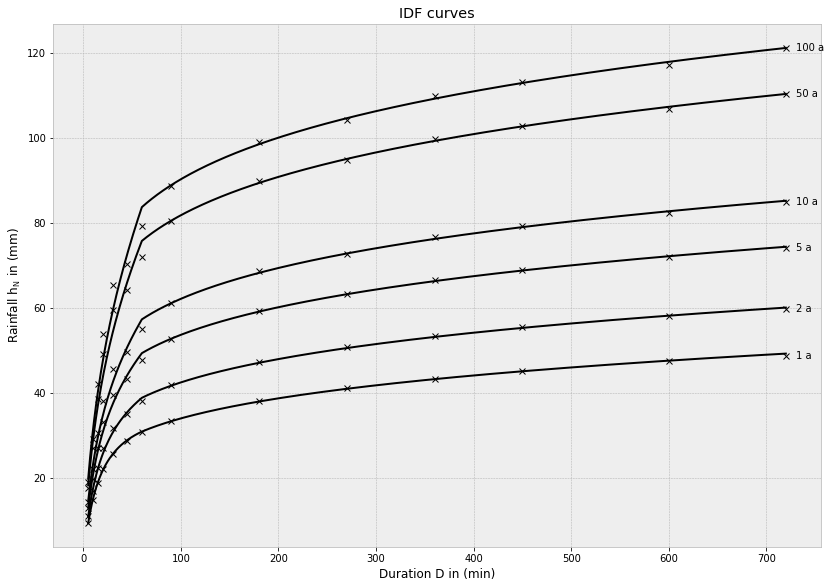

In [22]:
fig, ax = idf.result_figure()